In [1]:
import logomaker
import matplotlib.pyplot as plt
import torch

rand = torch.randn(26,64)
array = torch.nn.functional.softmax(rand, dim=1)
array_sums = torch.sum(array, dim=1)
print(array_sums)



tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


sums tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000])


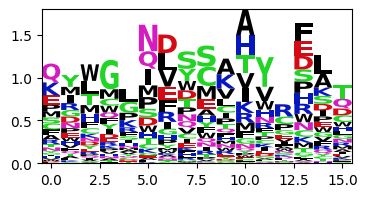

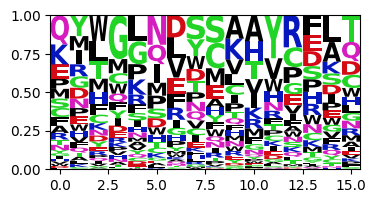

In [7]:
import logomaker
import matplotlib.pyplot as plt
import torch
import pandas as pd

rand = torch.randn(20,16)
array = torch.nn.functional.softmax(rand, dim=1)
array_sums = torch.sum(array, dim=1)
print("sums", array_sums)

aminoacids = "ACDEFGHIKLMNPQRSTVWY"
amino_acids = list(aminoacids)

array.cpu().detach().numpy()
array = array.T

df = pd.DataFrame(array, columns=amino_acids, dtype=float)

df1 = df.copy()

df2 = logomaker.transform_matrix(df1, normalize_values=True)

fig, ax = plt.subplots(1,1,figsize=[4,2])
logo = logomaker.Logo(df, ax=ax)


fig2, ax2 = plt.subplots(1,1,figsize=[4,2])
logo2 = logomaker.Logo(df2, ax=ax2)

In [3]:
array = torch.nn.functional.softmax(rand, dim=1)
array_sums = torch.sum(array, dim=1)
print(array_sums)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000])


In [4]:
import pandas as pd

aminoacids = "-[]XACDEFGHIKLMNOPQRSTUVWY"
amino_acids = list(aminoacids)

df = pd.DataFrame(array.T[0:10], columns=amino_acids, dtype=float)
print(df)

fig, ax = plt.subplots(1,1,figsize=[4,2])
logo = logomaker.Logo(df, ax=ax)

ValueError: Shape of passed values is (10, 20), indices imply (10, 26)

num_positions: 64, num_lines: 2
df (50, 26)
starting logomaker
finished logomaker
df (14, 26)
starting logomaker
finished logomaker


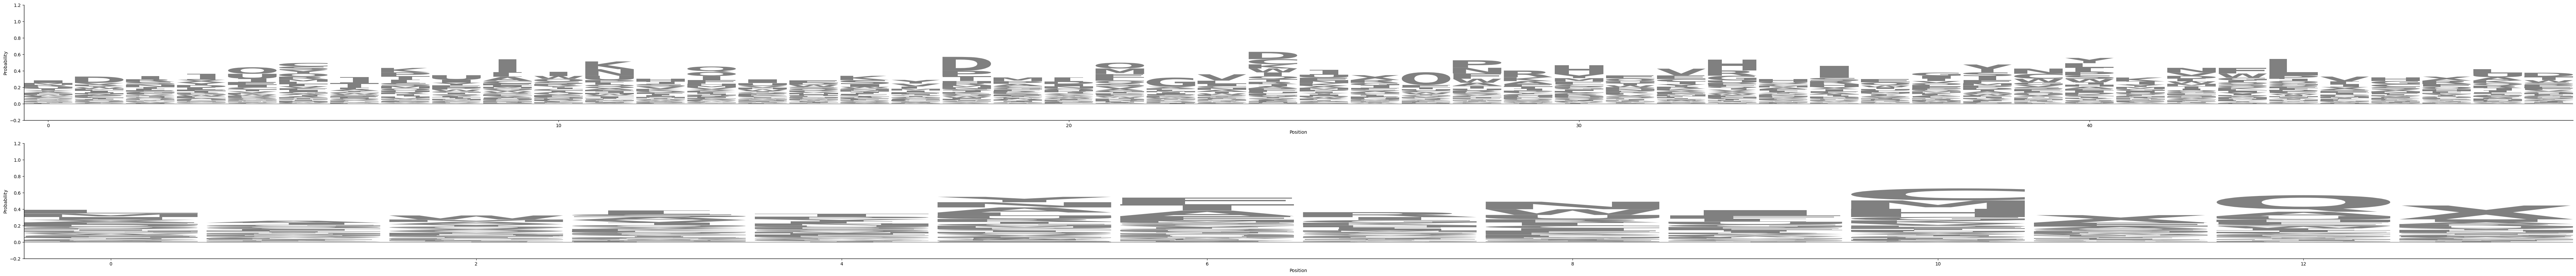

In [35]:
import pandas as pd

aminoacids = "-[]XACDEFGHIKLMNOPQRSTUVWY"
amino_acids = list(aminoacids)

num_positions = array.shape[1]
num_lines = (num_positions + 50 - 1) // 50

fig, axes = plt.subplots(num_lines, 1, figsize=(100, 5 * num_lines), squeeze=False)
print(f"num_positions: {num_positions}, num_lines: {num_lines}")
for line in range(num_lines):
    try:
        start = line * 50
        end = min(start + 50, num_positions)
        df = pd.DataFrame(array.T[start:end], columns=amino_acids, dtype=float)
        print("df", df.shape)
        print("starting logomaker")
        logo = logomaker.Logo(df, ax=axes[line, 0])
        print("finished logomaker")
        logo.style_spines(visible=False)
        logo.style_spines(spines=['left', 'bottom'], visible=True)
        logo.ax.set_ylabel("Probability")
        logo.ax.set_xlabel("Position")
        logo.ax.set_ylim(-0.2, 1.2)
    except Exception as e:
        print(f"Error: {e}")

            A         C         G         U
pos                                        
0    0.324656  0.358980  0.189313  0.127051
1    0.628560  0.110845  0.120658  0.139936
2    0.105337  0.027597  0.794143  0.072923
3    0.000000  0.000000  1.000000  0.000000
4    0.000000  0.028156  0.000000  0.971844
5    0.572633  0.038576  0.347800  0.040991
6    0.666476  0.085075  0.128766  0.119683
7    0.092191  0.065904  0.757889  0.084016
8    0.177637  0.156259  0.193662  0.472442


Text(0, 0.5, 'probability')

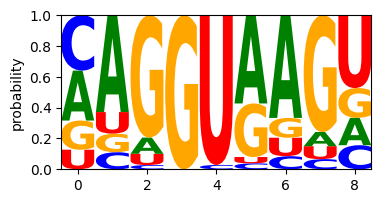

In [36]:
fig, ax = plt.subplots(1,1,figsize=[4,2])

# load ss probability matrix
ss_df = logomaker.get_example_matrix('ss_probability_matrix',
                                     print_description=False)
print(ss_df)
# create Logo object
ss_logo = logomaker.Logo(ss_df,
                         ax=ax,)

# style using Axes methods
ss_logo.ax.set_ylabel('probability')